# **Analisis de Empleabilidad y Salarios del Sector de DataScience 2020-2025**

<image src="img/dataset-cover.jpg">

_____

## **TEMA**

Este proyecto se centra en realizar un Análisis Exploratorio de Datos (EDA) para descubrir datos de interes, patrones y tendencias en las ofertas de trabajo realacionadas con los datos recojidas en el DataSet.
El objetivo es comprender las necesidades y puntos fuertes del sector para asi resolver dudas de trabajadores y sobre todo de estudiantes siendo asi un factor de cierre en ventas de cursos al resolver un numero de dudas con respecto al sector.

## **HIPOTESIS**

- La demanda de empleos relacionados con los datos a aumentado en los ultimos años y muestra indicios de seguir aumentando
- Los salarios tienden a superar la mediana de la poblacion. Alrededor de que porciento de la poblacion (percentiles) se encuentran los salarios?
- En el sector se aprecia un alto inidice de empleos remotos o hibridos que va en aumento con el paso de los años
- Estados unidos se corona como el pais donde mas demanda del sector hay. En Europa la mayoria de empleos se encontraran en paises como Inglaterra y Alemania, y España estara entre los 10 primeros
- Las empresas grandes no son necesariamente las que mejor pagan. Cual es la relacion entre la experiencia de trabajo y la demanda de esta segun el tamaño de la empresa?. A que tipo de empresa es mas coveniente ir segun la experiencia en el sector?

## **OBTENCION DE LOS DATOS**

### __FUENTES__   
- Kaggle: The AI, ML, Data Science Salary (2020- 2025) DataSet - [ [Link](https://www.kaggle.com/datasets/samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025) ]
- stack***overflow*** : 2024 Developer Survey - [ [Link](https://survey.stackoverflow.co/2024/work/) ]
- Manfred : Tech Career Report - **$**.alarios - [ [Link](https://www.getmanfred.com/blog/tech-career-report-alarios) ]

### **IMPORTACION DE LIBRERIAS**

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **DATA UNDERSTANDING**

### __Muestra de las primeras 10 entradas del DataSet__   

In [166]:
jobs = pd.read_csv('./data/salaries.csv')
jobs.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M
5,2025,EN,FT,Data Analyst,82000,USD,82000,US,0,US,M
6,2025,EN,FT,Data Analyst,44000,USD,44000,US,0,US,M
7,2025,SE,FT,Software Development Engineer,149800,USD,149800,US,0,US,L
8,2025,SE,FT,Software Development Engineer,89700,USD,89700,US,0,US,L
9,2025,SE,FT,Research Scientist,200000,USD,200000,US,0,US,M


### __Muestra de infromacion general del DataSet__   

In [167]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


### __Muestra de datos estadisticos generales del DataSet__   

In [168]:
jobs.describe().round()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.0,88584.0,88584.0,88584.0
mean,2024.0,161932.0,157568.0,21.0
std,1.0,196532.0,73531.0,41.0
min,2020.0,14000.0,15000.0,0.0
25%,2024.0,106000.0,106097.0,0.0
50%,2024.0,147000.0,146307.0,0.0
75%,2024.0,199500.0,198600.0,0.0
max,2025.0,30400000.0,800000.0,100.0


In [169]:
jobs.duplicated(keep=False).value_counts()

True     57669
False    30915
Name: count, dtype: int64

## **DATA CLEANIG**

### __Eliminacion de puestos no relacionados con Data Science__

In [170]:
key_words = ('Data','Machine Learning', 'Analyst', 'Analysis', 'Analytics','Bussiness Intelligence', 'AI', 'BI', 'Decision Scientist','Computer Vision', 'NLP', 'ML', 'Artificial Intelligence','Deep Learning', 'ETL')

jobs = jobs[jobs['job_title'].str.contains('|'.join(key_words))]


### __Comprobar que todos los puestos filtrados esten relacionados con Data Science__

In [171]:
print(jobs['job_title'].unique())

['Data Analyst' 'Data Scientist' 'AI Data Scientist'
 'Admin & Data Analyst' 'Data Management Specialist' 'Data Product Owner'
 'Machine Learning Engineer' 'Data Engineer' 'Data Operations Engineer'
 'Analytics Engineer' 'Analyst' 'Actuarial Analyst' 'BI Analyst'
 'AI Engineer' 'Data Governance Analyst' 'Business Intelligence Analyst'
 'Data Management Analyst' 'Data and Reporting Analyst'
 'Data Reporting Analyst' 'Data Architect' 'Data Manager' 'Data Reporter'
 'Data Governance' 'Database Administrator' 'Product Analyst'
 'Data Specialist' 'BI Developer' 'Machine Learning Scientist'
 'Insight Analyst' 'Data Analytics Manager' 'Data Modeler'
 'Data Platform Engineer' 'AI Researcher' 'Data Developer'
 'Quantitative Analyst' 'Head of AI' 'Data Visualization Analyst'
 'Analytics Specialist' 'Head of Data' 'AI Governance Lead'
 'Director of Machine Learning' 'AI Architect' 'DataOps Engineer'
 'Data Governance Specialist' 'Data Visualization Engineer' 'AI Developer'
 'Data Governance Lead'

### __Eliminar puestos ejecutivos para disminuir el sesgo de los datos__   
  - ***Presentar antes un resumen corto***

<Axes: xlabel='salary_in_usd', ylabel='experience_level'>

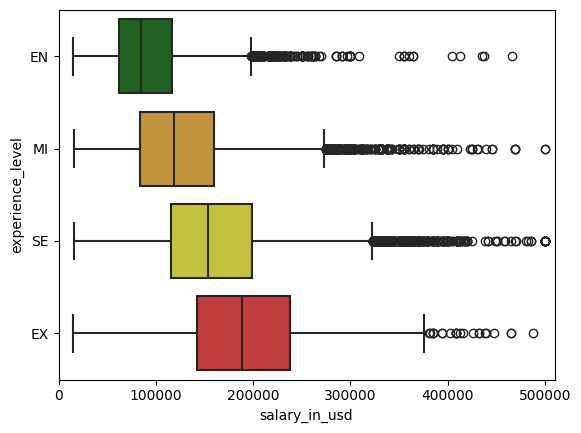

In [172]:
plt.xlim(0, 510000)
sns.boxplot(data=jobs, x='salary_in_usd', y='experience_level', hue='experience_level',order=['EN','MI','SE','EX'], palette=['green', 'yellow','orange','red'],saturation=.52, linewidth=1.5 ,legend=False)

In [173]:
jobs = jobs[jobs['experience_level'] != 'EX']

### **Verificacion de duplicados**

In [174]:
jobs.duplicated(keep=False).value_counts()

True     34112
False    18711
Name: count, dtype: int64

In [175]:
jobs[(jobs.duplicated(keep=False)) == True]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2025,EN,FT,Data Analyst,82000,USD,82000,US,0,US,M
6,2025,EN,FT,Data Analyst,44000,USD,44000,US,0,US,M
11,2025,SE,FT,Data Scientist,160000,USD,160000,US,0,US,M
12,2025,SE,FT,Data Scientist,130000,USD,130000,US,0,US,M
17,2025,MI,FT,AI Data Scientist,200000,USD,200000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
88426,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
88431,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S
88502,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
88506,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S


***Se llega a al conclusion de que pueden haber trabajos que compartan los mismos datos por lo tanto, al no haber indicio de haber creado duplicados en modifiaciones anteriores, se mantiene el DataSet tal cual esta***

### **Nuevos datos y transformaciones**

***Nada por ahora***

## **Data ANALYSIS**